<a href="https://colab.research.google.com/github/aneeq-shaffy/SE4050-Deep-Learning/blob/main/mBERT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers datasets torch scikit-learn pandas matplotlib seaborn tqdm --quiet


In [3]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tqdm import tqdm
import re
import pickle

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = "/content/drive/MyDrive/mBERT_Project/News_Category_Dataset_v3.json"
df = pd.read_json(file_path, lines=True)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [7]:
df = df[['headline', 'short_description', 'category']]
df.dropna(inplace=True)

In [8]:
# Combine text fields
df['text'] = df['headline'] + " " + df['short_description']

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [10]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

print("Unique categories:", len(label_encoder.classes_))
print(df['category'].value_counts().head(10))

Unique categories: 42
category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64


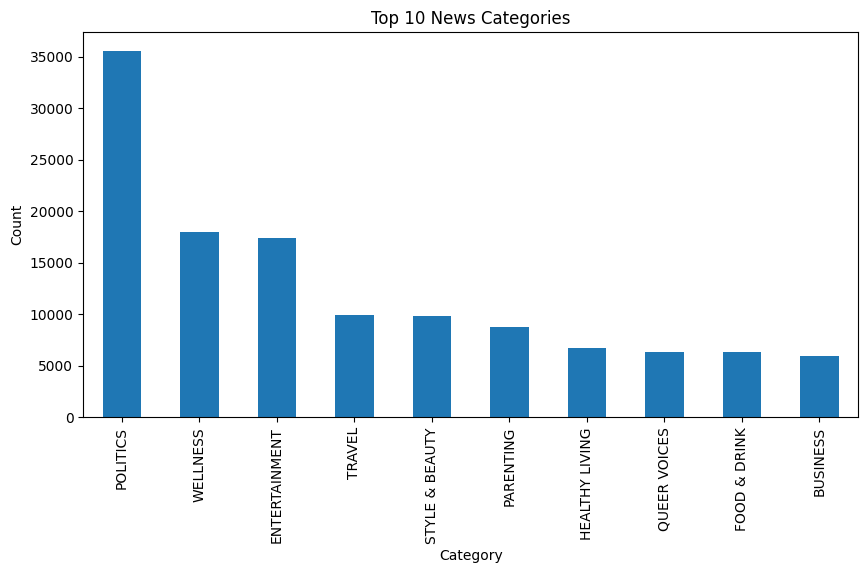

In [11]:
plt.figure(figsize=(10,5))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 News Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [12]:
df[['clean_text', 'label']].to_csv("/content/drive/MyDrive/mBERT_Project/cleaned_news.csv", index=False)
print("✅ Cleaned dataset saved!")

✅ Cleaned dataset saved!


In [13]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)